In [390]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pickle

In [34]:
ds = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header=1)
ds.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [35]:
ds.shape

(246, 14)

In [36]:
ds.drop(index=[122,123,124], inplace=True) #drop unwanted rows
ds.reset_index(drop=True, inplace=True) #Resetting indexes after deleting rows


In [37]:
ds['Region'] = 0
for i in range(len(ds)):
    if i < 125:
        ds['Region'][i]=0
    else:
        ds['Region'][i]=1

In [38]:
ds.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [39]:
ds.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
242,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [40]:
ds.shape

(243, 15)

In [41]:
ds.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [57]:
ds.columns = [i.strip() for i in ds.columns]
ds.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [44]:
ds.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [45]:
ds[ds['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
164,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [101]:
ds.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [102]:
ds.Classes = ds.Classes.str.strip()

In [103]:
ds.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [104]:
ds.at[164, 'DC'] = 14.6
ds.at[164, 'ISI'] = 9
ds.at[164, 'BUI'] = 12.5
ds.at[164, 'FWI'] = 10.4
ds.at[164, 'Classes'] = 'fire'

ds.iloc[164]

day              14
month            07
year           2012
Temperature      37
RH               37
Ws               18
Rain            0.2
FFMC           88.9
DMC            12.9
DC             14.6
ISI             9.0
BUI            12.5
FWI            10.4
Classes        fire
Region            1
Name: 164, dtype: object

In [105]:
ds.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [106]:
# Checking missing value
ds.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [107]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(4), object(4)
memory usage: 28.6+ KB


In [108]:
ds.dtypes

day             object
month           object
year            object
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

In [109]:
col_name = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']
ds[col_name] = ds[col_name].apply(pd.to_numeric)

In [110]:
ds.dtypes

day             object
month           object
year            object
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

In [111]:
ds.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
238    False
239    False
240    False
241    False
242    False
Length: 243, dtype: bool

In [112]:
ds.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.172840,61.901235,15.518519,0.760905,77.973251,14.723457,49.418107,4.769136,16.709053,7.062140,0.485597
std,3.641327,14.903495,2.806918,2.003528,14.304628,12.368735,47.669277,4.144776,14.205324,7.419945,0.500824
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.450000,5.800000,14.400000,1.400000,6.050000,0.750000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.700000,11.300000,33.100000,3.500000,12.500000,4.700000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.300000,22.650000,11.100000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [113]:
col_cat = [feature for feature in ds.columns if ds[feature].dtype == 'O']
col_num = [feature for feature in ds.columns if ds[feature].dtype != 'O']

In [114]:
ds[col_cat].head()

,day,month,year,Classes
0,01,06,2012,not fire
1,02,06,2012,not fire
2,03,06,2012,not fire
3,04,06,2012,not fire
4,05,06,2012,not fire


In [115]:
ds[col_num].head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [116]:
ds[col_num].tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,1


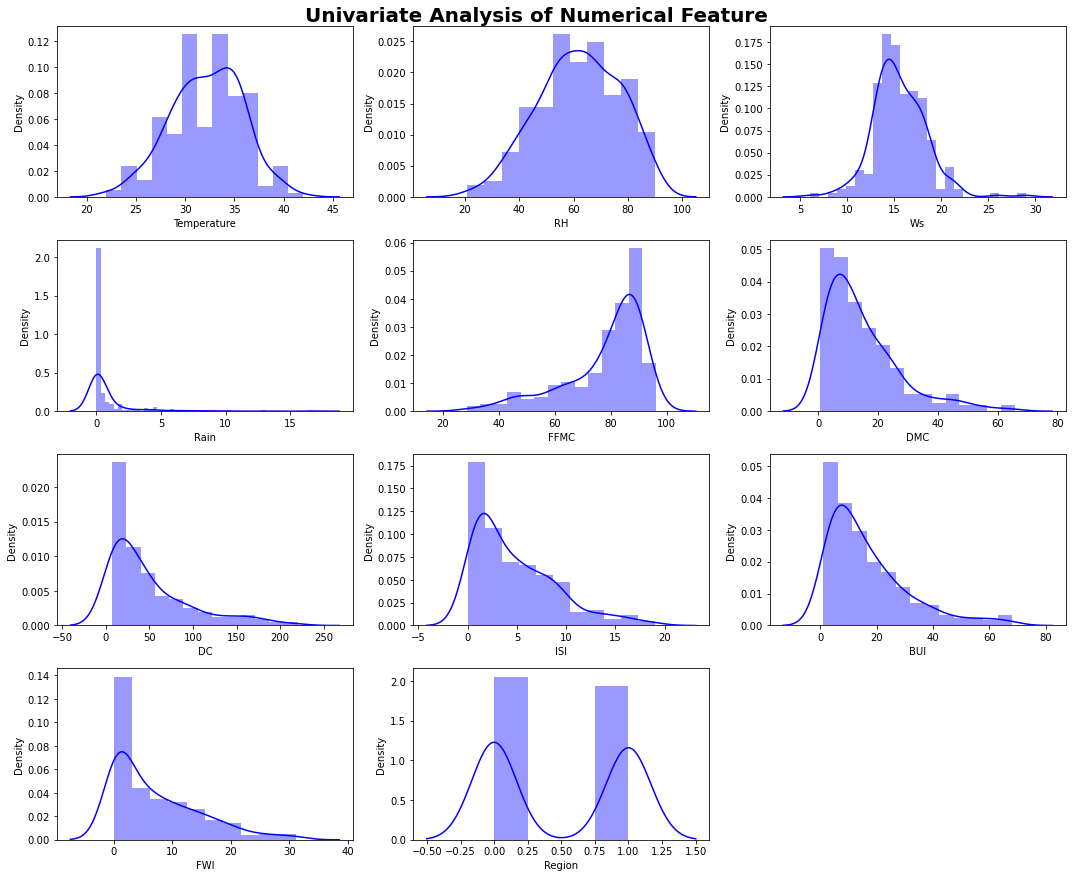

In [117]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Feature', fontsize=20, fontweight='bold')
for i in range(0, len(col_num)):
    plt.subplot(5, 3, i+1)
    sns.distplot(x=ds[col_num[i]], color='b')
    plt.xlabel(col_num[i])
    plt.tight_layout()

Observations:
1. Temperature, RS, WS, are much more normally distributed
2. Rain has the maximum outliers
3. FFMS is Right Skewed
4. DMC, DC, ISI, BUI, FWI are more off a Left Skewed

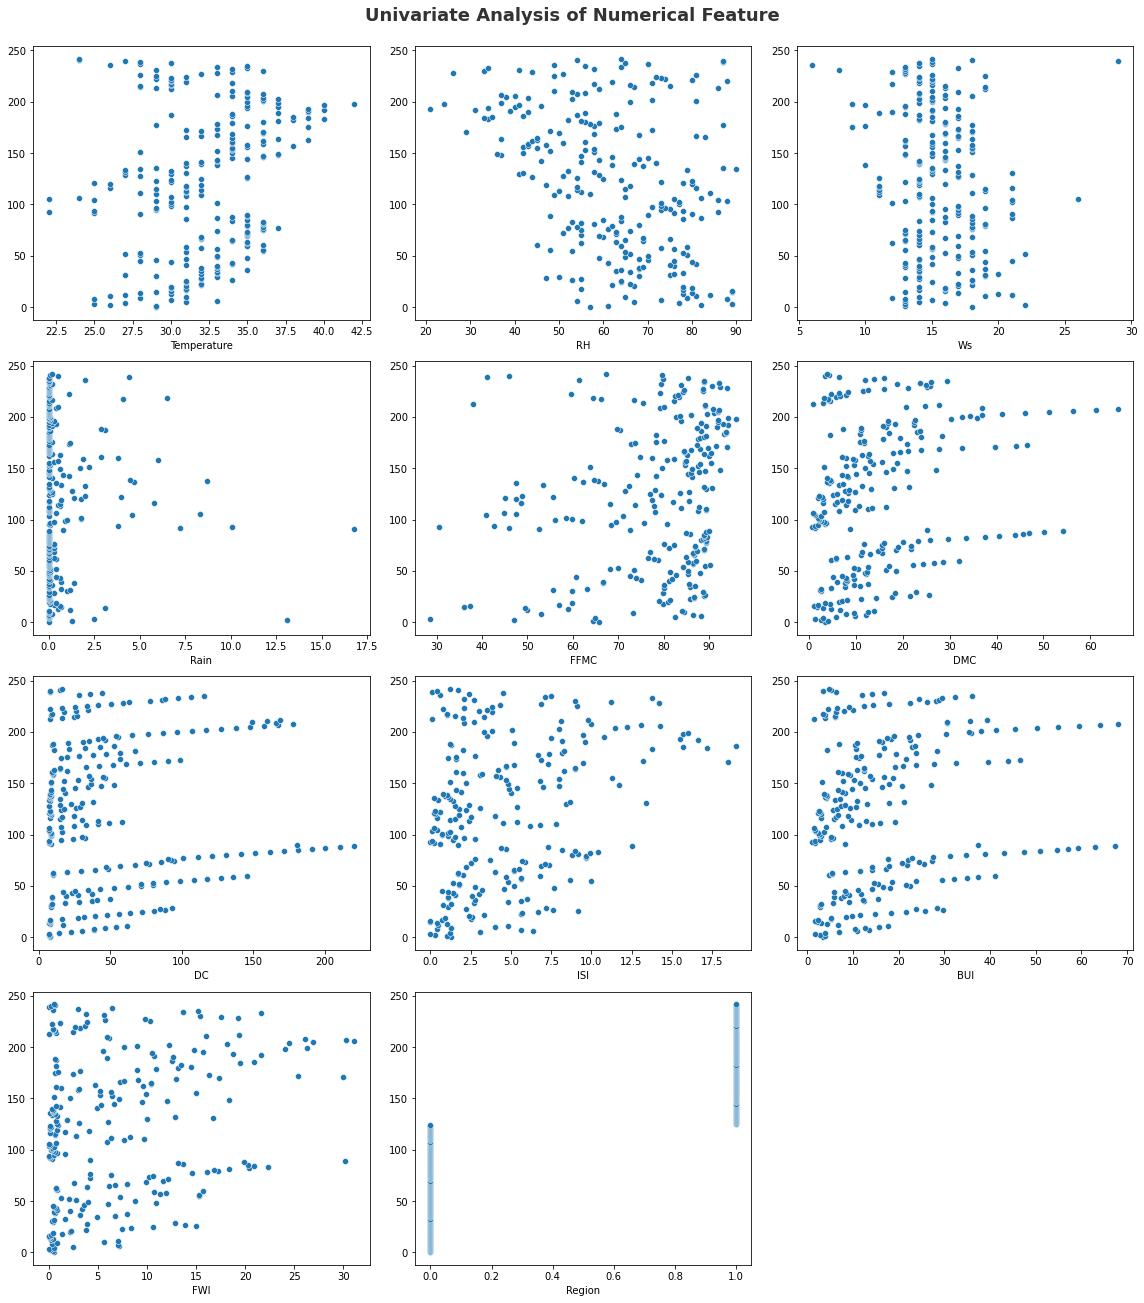

In [118]:
plt.figure(figsize=(16, 22))
plt.suptitle('Univariate Analysis of Numerical Feature', fontsize=18, fontweight='bold', alpha=0.8, y=1)
for i in range(0, len(col_num)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(x=ds[col_num[i]], y=ds.index, data=ds)
    plt.xlabel(col_num[i])
    plt.tight_layout()

1. Maximum Temperature is above 40 degree
2. Most of the RH lies in between 50 to 80
3. And most of the Ws lies between 10 to 20

Text(0.5, 0, 'Temperature')

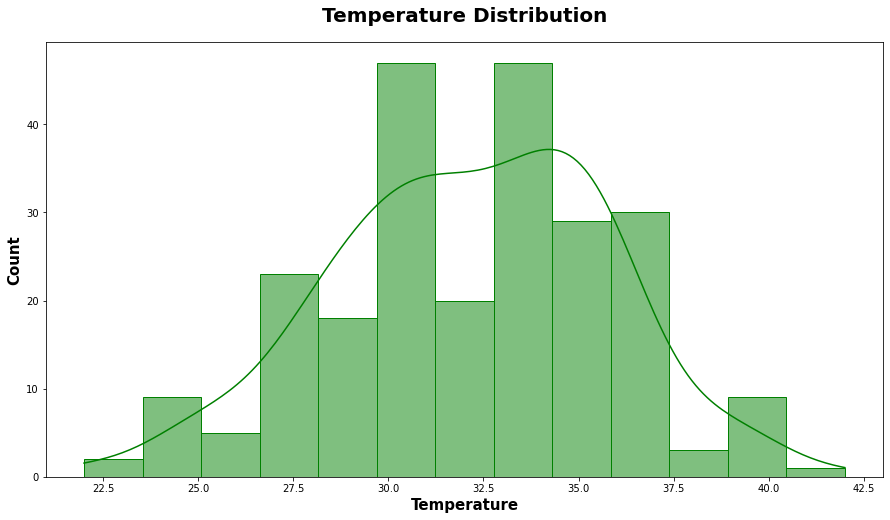

In [119]:
plt.subplots(figsize=(15,8))
sns.histplot(x=ds.Temperature, ec = "green", color = "green", kde = True)
plt.title('Temperature Distribution', weight = 'bold', fontsize = 20, pad = 20)
plt.ylabel('Count', weight='bold', fontsize=15)
plt.xlabel('Temperature', weight='bold', fontsize=15)

Observation
1. Temperature occur most of the time in range 32.5 to 35.0

## Temperature Vs Rain

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

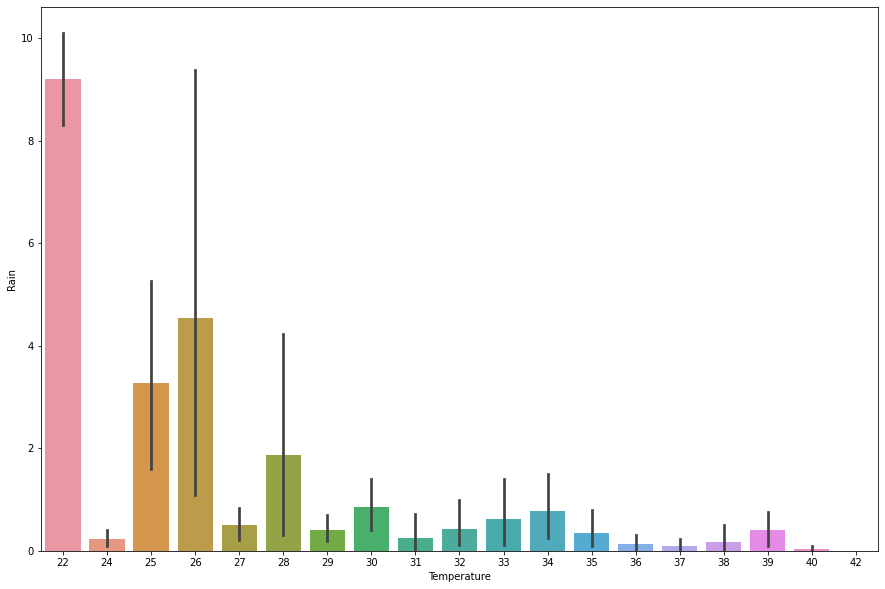

In [120]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 10)
sns.barplot(x='Temperature', y = 'Rain', data=ds)

### Which region has most temperature

<AxesSubplot:xlabel='Region', ylabel='Temperature'>

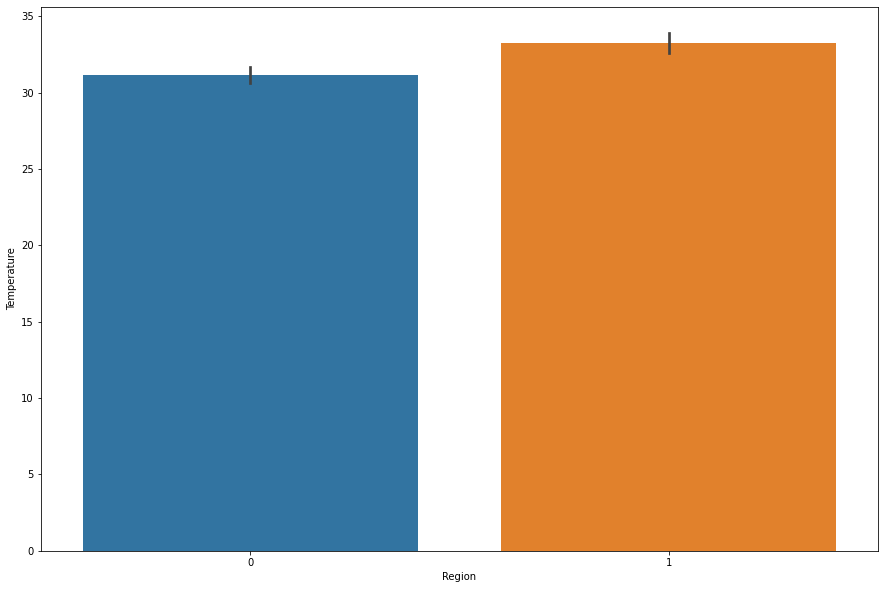

In [121]:
matplotlib.rcParams['figure.figsize']=(15,10)
sns.barplot(x="Region",y="Temperature",data=ds)

In [122]:
ds.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
Temperature,1.000000,-0.654829,-0.279276,-0.326794,0.680171,0.483884,0.370296,0.607521,0.456290,0.567441,0.291405
RH,-0.654829,1.000000,0.240177,0.223216,-0.645312,-0.403774,-0.217616,-0.687178,-0.346405,-0.578097,-0.427586
Ws,-0.279276,0.240177,1.000000,0.170562,-0.172025,-0.006351,0.071670,0.006141,0.024599,0.028307,-0.156337
Rain,-0.326794,0.223216,0.170562,1.000000,-0.546607,-0.289251,-0.296903,-0.348815,-0.299498,-0.325129,-0.056365
FFMC,0.680171,-0.645312,-0.172025,-0.546607,1.000000,0.600304,0.500711,0.739587,0.586688,0.689306,0.261148
DMC,0.483884,-0.403774,-0.006351,-0.289251,0.600304,1.000000,0.874273,0.678138,0.981565,0.875440,0.218755
DC,0.370296,-0.217616,0.071670,-0.296903,0.500711,0.874273,1.000000,0.503253,0.941890,0.737580,-0.058700
ISI,0.607521,-0.687178,0.006141,-0.348815,0.739587,0.678138,0.503253,1.000000,0.639625,0.921749,0.292711
BUI,0.456290,-0.346405,0.024599,-0.299498,0.586688,0.981565,0.941890,0.639625,1.000000,0.856644,0.113570
FWI,0.567441,-0.578097,0.028307,-0.325129,0.689306,0.875440,0.737580,0.921749,0.856644,1.000000,0.223473


Correlation Graph

Pairplot

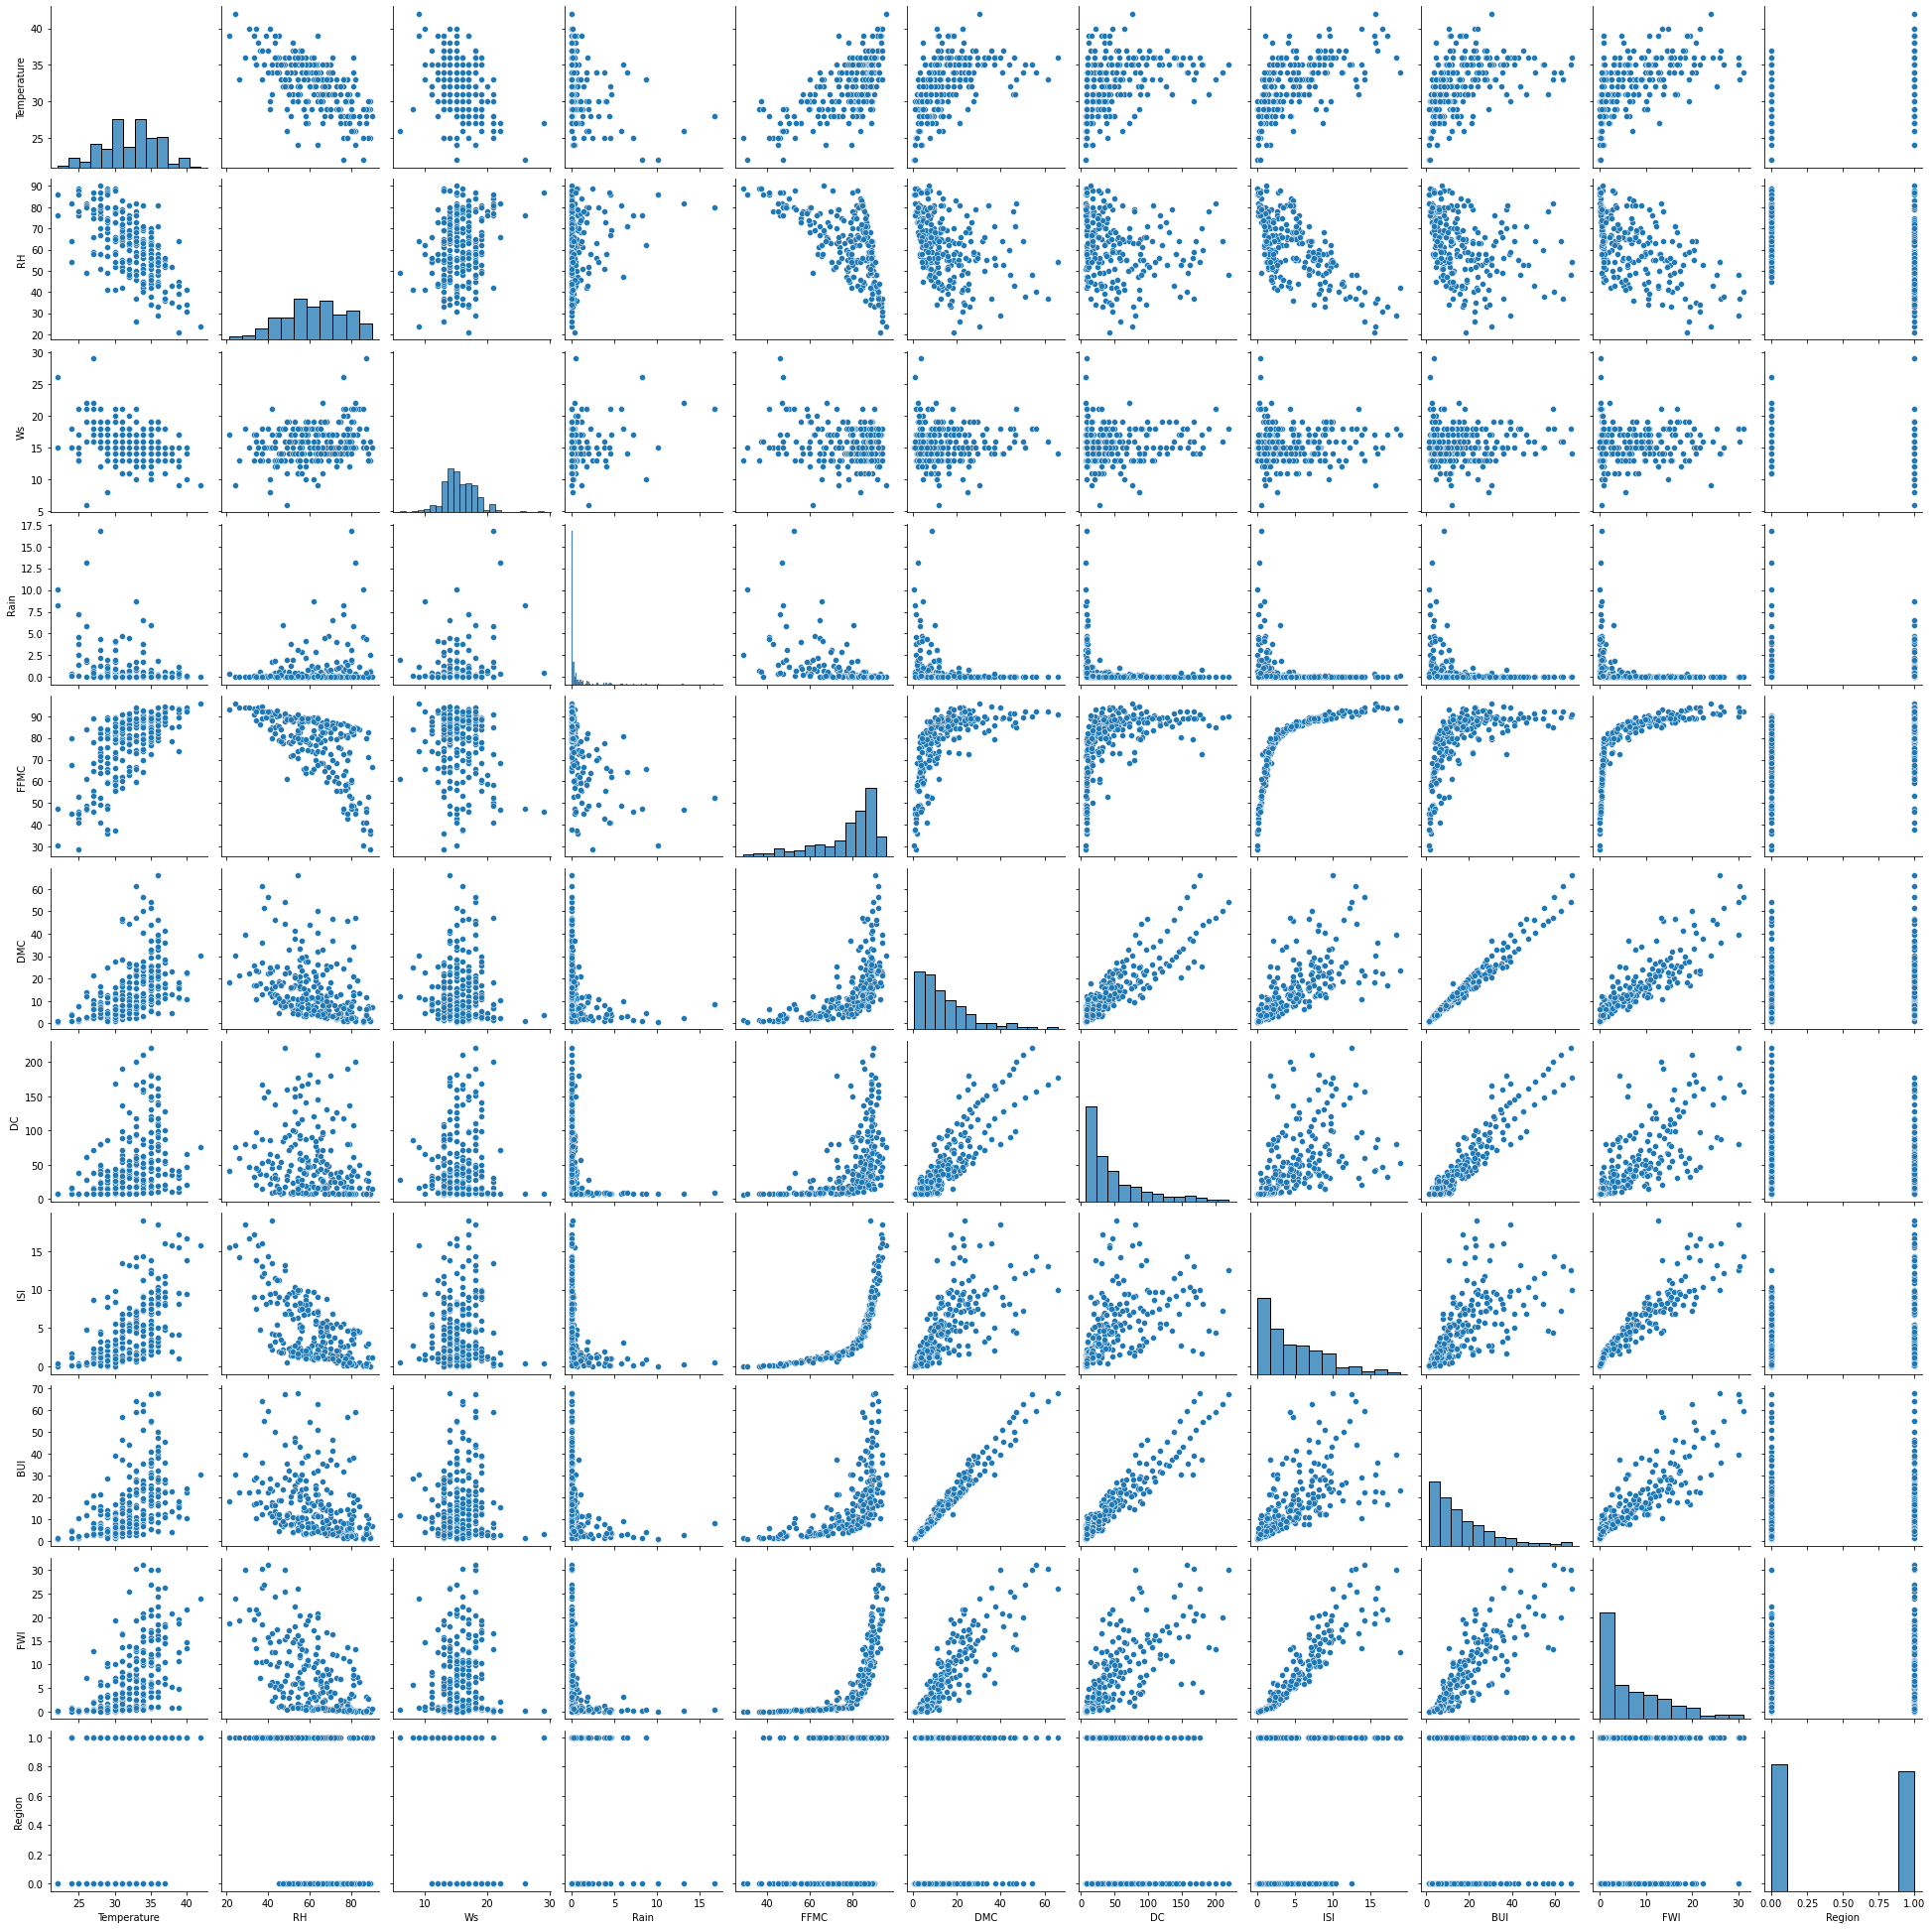

In [133]:
sns.pairplot(ds)

<AxesSubplot:>

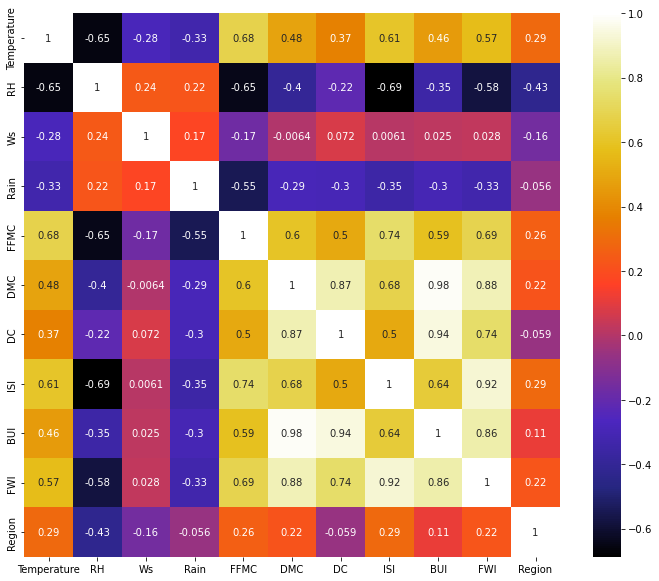

In [123]:
plt.figure(figsize=(12,10))
sns.heatmap(ds[col_num].corr(), cmap="CMRmap", annot=True)

Observation:
The target feature Temperature is highly positively correlated with FFMC,ISI

Temperature Vs Month


<AxesSubplot:xlabel='Temperature', ylabel='month'>

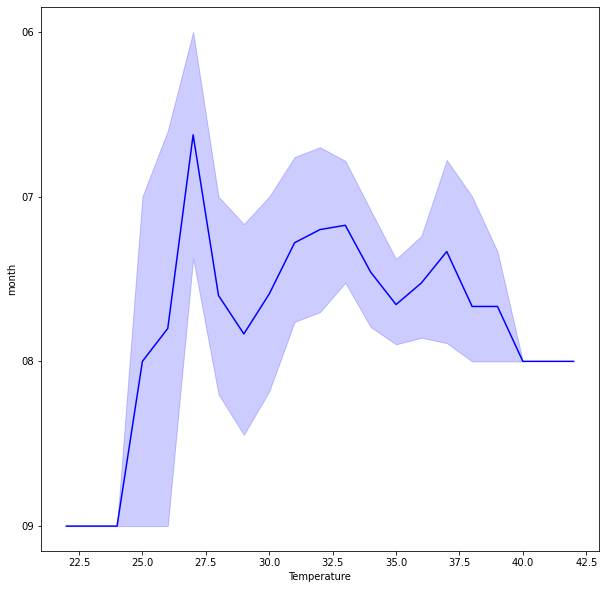

In [124]:
plt.figure(figsize = (10,10))
sns.lineplot(x='Temperature', y='month', color = 'b', data=ds)

Plot to see the relationship between numerical feature and target

Bar Plot

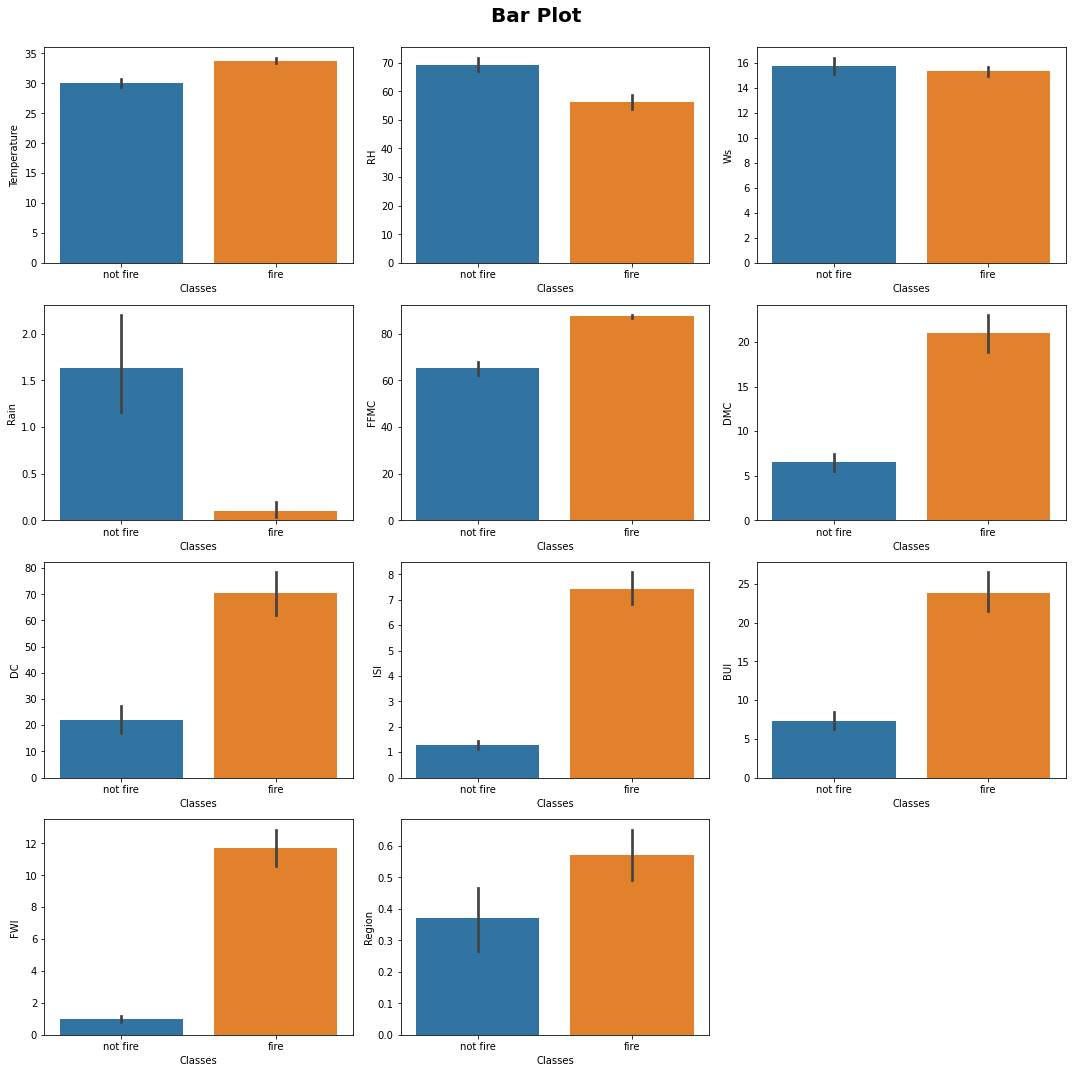

In [125]:
plt.figure(figsize=(15,18))
plt.suptitle('Bar Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(col_num)):
    plt.subplot(5,3,i+1)
    sns.barplot(y=col_num[i], x = 'Classes', data=ds)
    plt.tight_layout()

Strip Plot

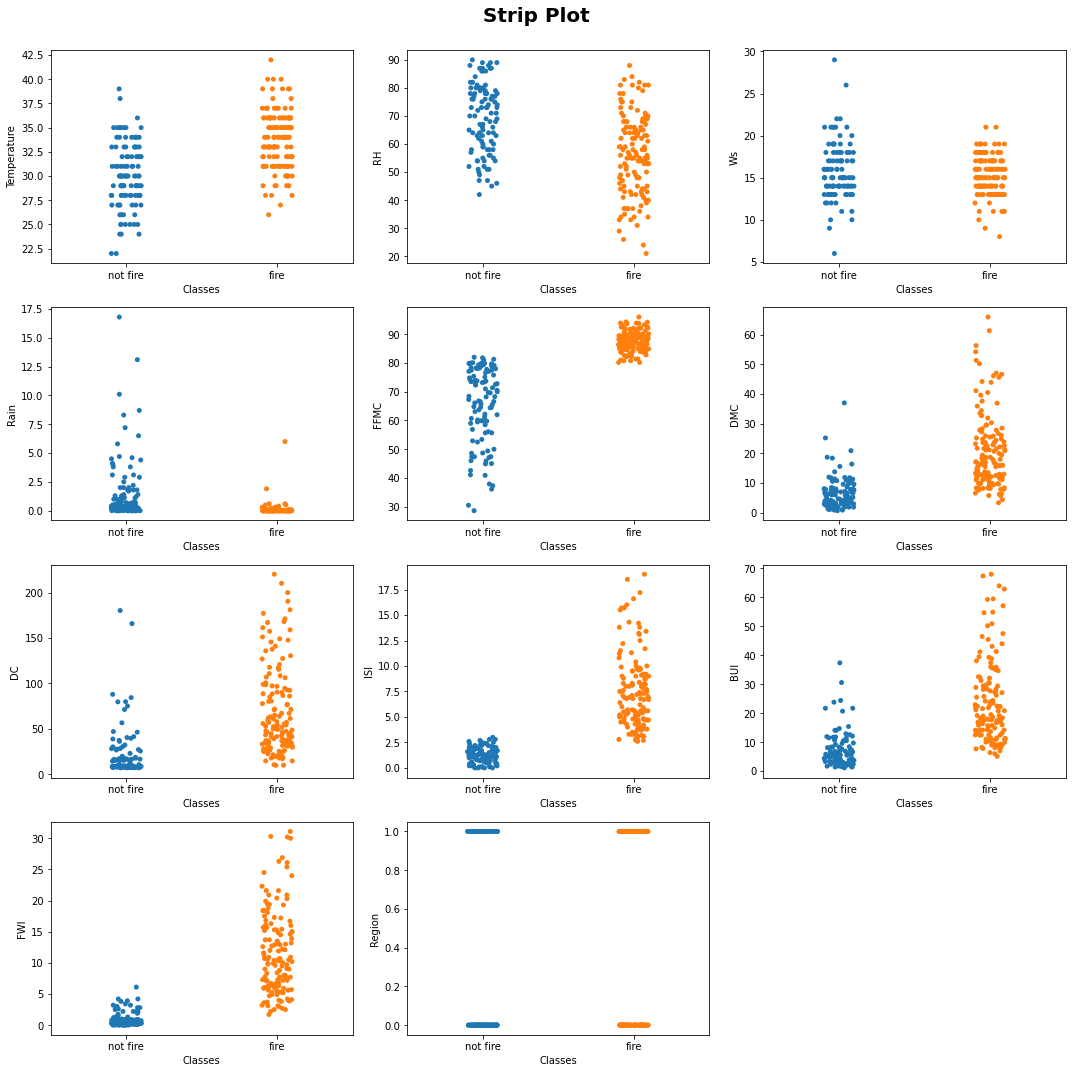

In [126]:
plt.figure(figsize=(15,18))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(col_num)):
    plt.subplot(5,3,i+1)
    sns.stripplot(y=col_num[i], x = 'Classes', data=ds)
    plt.tight_layout()

Report:
1. High temperature high chances of fire
2. Low humidity high fire
3. FFMC > 80, fire has taken place
4. ISI > 2.5, fire has taken place
5. FWI > 4, fire has taken place

## Outliers

<AxesSubplot:>

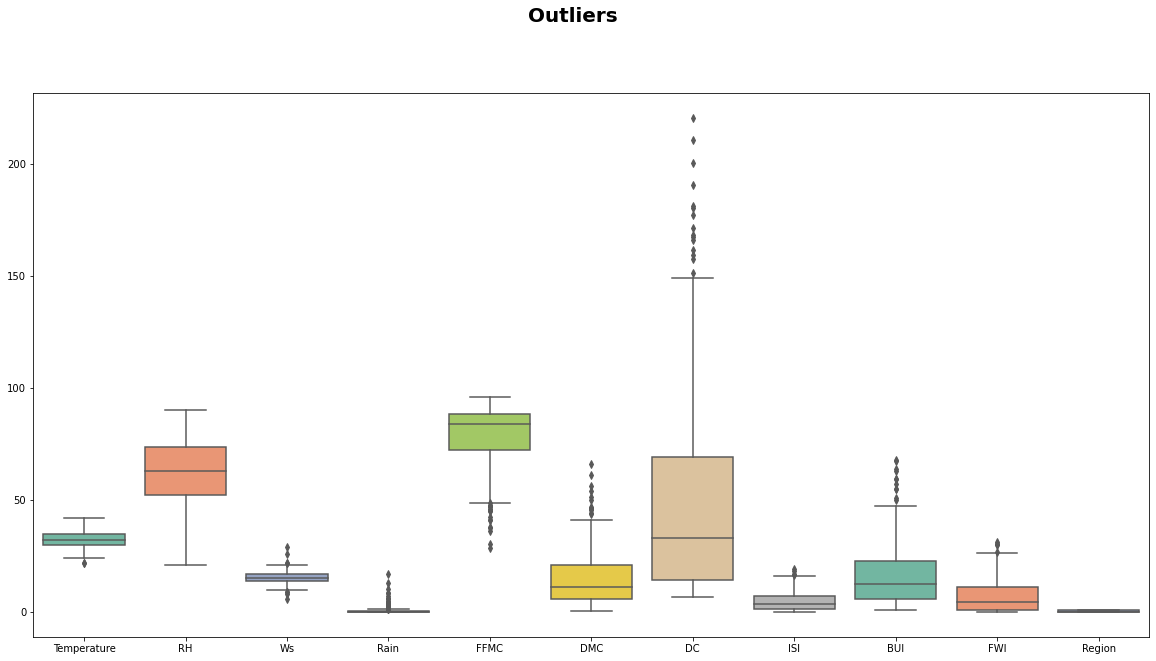

In [129]:
fig = plt.figure(figsize=(20, 10))
plt.suptitle('Outliers', fontsize =20, fontweight = 'bold', alpha = 1, y = 1)
sns.boxplot(orient='v', data=ds[col_num], palette= 'Set2')

Observation:
    1. Rain, DC, DMC and BUI has many outliers which should be handled

# Which month has the highest temperature?

<Figure size 1080x1080 with 0 Axes>

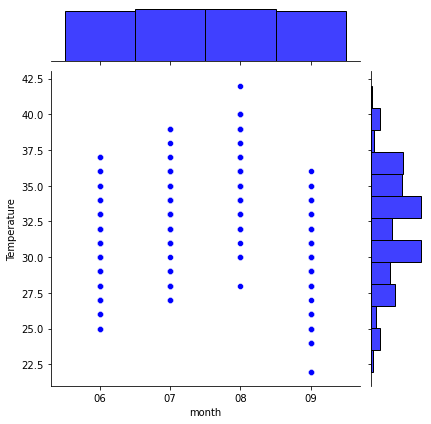

In [132]:
plt.figure(figsize=(15,15))
sns.jointplot(x= 'month', y = 'Temperature', data=ds, color = 'b')

Observation:
1. It can be oberved month of august show the highest temperature than any other months that is 42 degrees

What is the maximum temperature observed?

In [134]:
ds.Temperature.max()

42

What is the lowest record temperature?

In [135]:
ds.Temperature.min()

22

When is the highest and lowest rainfall oberved?

In [140]:
highest_rainfall = ds.sort_values(by='Rain', ascending=False)[['Rain', 'day', 'month']].head(1)
lowest_rainfall = ds.sort_values(by='Rain', ascending=False)[['Rain', 'day', 'month']].tail(1)

In [142]:
highest_rainfall

,Rain,day,month
91,16.8,31,08


In [143]:
lowest_rainfall

,Rain,day,month
0,0.0,01,06


# Linear Regression 

## Creating Dependent and Independent Features 

In [260]:
ds.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Independent Feature

In [261]:
x=pd.DataFrame(ds, columns=['RH', 'Ws', 'Rain', 'FFMC', 'DMC','DC', 'ISI', 'BUI', 'FWI', 'Region'])

Dependent Feature

In [262]:
y=pd.DataFrame(ds, columns=['Temperature'])

In [263]:
#Independent Features
x

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...
238,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
239,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
240,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
241,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [264]:
#Dependent features
y

,Temperature
0,29
1,29
2,26
3,25
4,27
...,...
238,30
239,28
240,27
241,24


Train Test Split

In [265]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=10)

In [266]:
x_train.shape

(162, 10)

In [267]:
x_test.shape

(81, 10)

In [268]:
y_train.shape

(162, 1)

In [269]:
y_test.shape

(81, 1)

Independnet Training Dataset

In [270]:
x_train

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
25,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,0
121,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,0
173,71,17,0.0,87.3,46.6,99.0,6.9,46.5,16.3,1
72,51,13,0.3,81.3,15.6,75.1,2.5,20.7,4.2,0
185,35,15,0.0,93.8,23.0,42.7,15.7,22.9,20.9,1
...,...,...,...,...,...,...,...,...,...,...
64,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9,0
15,89,13,0.7,36.1,1.7,7.6,0.0,2.2,0.0,0
228,26,13,0.0,93.9,21.2,59.2,14.2,22.4,19.3,1
125,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,1


Dependent Training Dataset

In [271]:
y_train

,Temperature
25,31
121,25
173,31
72,35
185,38
...,...
64,34
15,29
228,33
125,32


In [272]:
y_test

,Temperature
46,29
225,29
180,36
116,26
124,30
...,...
127,35
241,24
207,33
102,30


Standardizing or Feature Scaling

In [273]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [274]:
scaler

StandardScaler()

In [275]:
x_train = scaler.fit_transform(x_train)

In [276]:
x_test = scaler.transform(x_test)

In [277]:
x_train

array([[ 0.0473997 ,  0.89679491, -0.43894049, ...,  0.39791203,
         0.54056021, -0.9877296 ],
       [ 0.98220418, -0.6165465 ,  0.43279071, ..., -0.99225485,
        -0.92430026, -0.9877296 ],
       [ 0.51480194,  0.51845956, -0.43894049, ...,  2.20078471,
         1.33577018,  1.01242284],
       ...,
       [-2.48992674, -0.99488186, -0.43894049, ...,  0.45583565,
         1.75430175,  1.01242284],
       [-0.2196873 , -0.6165465 , -0.31440746, ..., -0.6953963 ,
        -0.81269185,  1.01242284],
       [ 1.04897592, -1.37321721, -0.43894049, ..., -0.2537287 ,
        -0.81269185, -0.9877296 ]])

In [278]:
x_test

array([[ 4.48030189e-01, -6.16546502e-01, -4.38940489e-01,
         3.80498723e-01, -4.00436729e-01, -2.96898053e-01,
        -3.42619388e-01, -3.62335485e-01, -4.36013438e-01,
        -9.87729597e-01],
       [-9.54176529e-01,  1.27513027e+00, -4.38940489e-01,
         7.66460723e-01, -2.22150412e-01, -3.11590076e-01,
         1.08990734e+00, -2.68209602e-01,  4.98707055e-01,
         1.01242284e+00],
       [-4.86774290e-01,  1.40124205e-01, -4.38940489e-01,
         7.86424275e-01,  8.22098020e-01,  1.85839836e-01,
         8.71386318e-01,  5.57201985e-01,  9.03287567e-01,
         1.01242284e+00],
       [ 1.18251942e+00,  2.03180097e+00,  3.17251734e+00,
        -1.89534617e+00, -9.43785506e-01, -8.50997195e-01,
        -1.02246258e+00, -9.48812139e-01, -9.24300262e-01,
        -9.87729597e-01],
       [ 4.73996980e-02, -6.16546502e-01, -4.38940489e-01,
         1.54245137e-01, -7.57009364e-01, -6.89384946e-01,
        -5.85420529e-01, -7.60560374e-01, -7.98740793e-01,
        -9.

Model Training

In [279]:
from sklearn.linear_model import LinearRegression

In [280]:
regression = LinearRegression()

In [281]:
regression
regression.fit(x_train, y_train)

LinearRegression()

Coefficient

In [282]:
print(regression.coef_)

[[-1.50393601 -0.64822259 -0.22344271  0.92311739 -0.11611152  0.2686697
   0.36730557  0.55199685 -0.50314121  0.15462816]]


Intercept

In [283]:
print(regression.intercept_)

[32.01851852]


Prediction for Test Data

In [284]:
pred = regression.predict(x_test)

In [285]:
pred

array([[31.90121146],
       [33.53256859],
       [33.76798536],
       [25.75849525],
       [32.1043303 ],
       [33.59077291],
       [31.68747546],
       [34.60243967],
       [32.89935128],
       [33.5607316 ],
       [34.02108452],
       [32.90909498],
       [35.78820378],
       [31.98476378],
       [34.06360105],
       [33.4708984 ],
       [27.56001598],
       [36.13698854],
       [32.70989604],
       [24.73313251],
       [32.09935904],
       [32.47670665],
       [33.12052381],
       [33.2223907 ],
       [30.07018239],
       [34.02320066],
       [34.00277509],
       [35.27345592],
       [31.92108197],
       [34.64854204],
       [34.08436446],
       [33.97507652],
       [32.56734056],
       [32.79201292],
       [31.0340124 ],
       [28.73736756],
       [32.24216797],
       [31.9563925 ],
       [33.35984219],
       [33.903294  ],
       [34.24833585],
       [33.94353991],
       [34.12172931],
       [37.31412223],
       [32.78810613],
       [36

<AxesSubplot:ylabel='Density'>

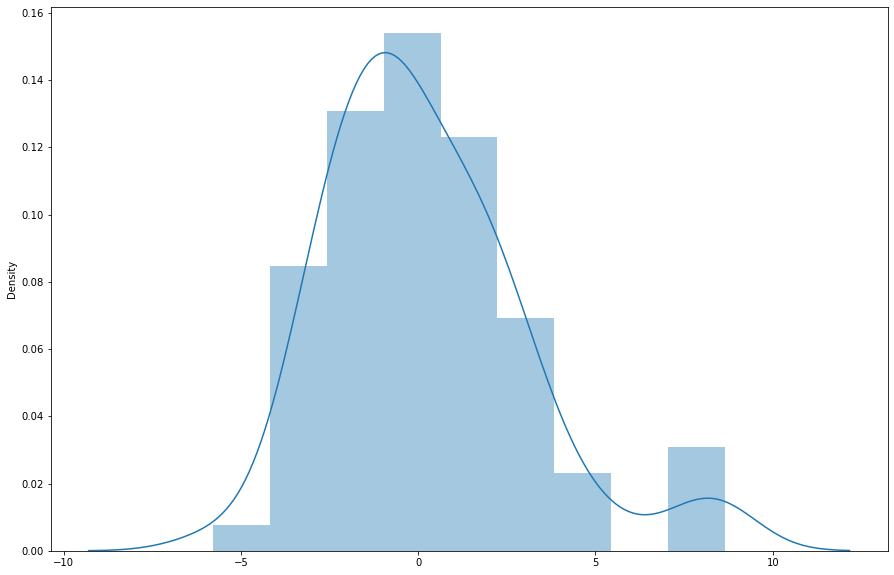

In [286]:
sns.distplot(pred-y_test)

Text(0, 0.5, 'Test Predicted Data')

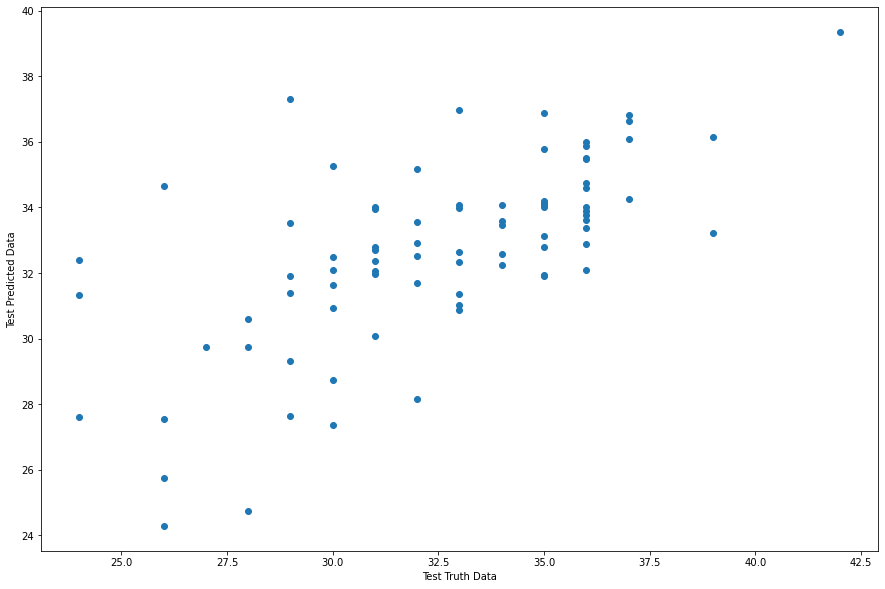

In [287]:
plt.scatter(y_test, pred)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

Residuals

In [288]:
residual = y_test - pred
residual

,Temperature
46,-2.901211
225,-4.532569
180,2.232015
116,0.241505
124,-2.104330
...,...
127,0.792641
241,-8.405576
207,-3.973241
102,2.635957


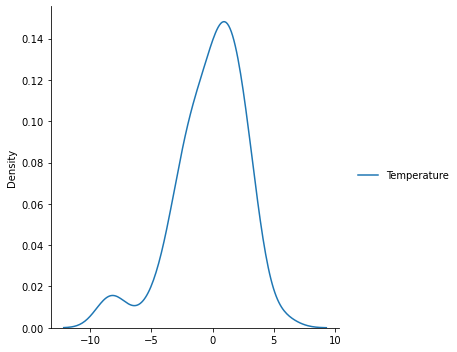

In [289]:
sns.displot(residual, kind = 'kde')

Scatterplot with prediction and residual

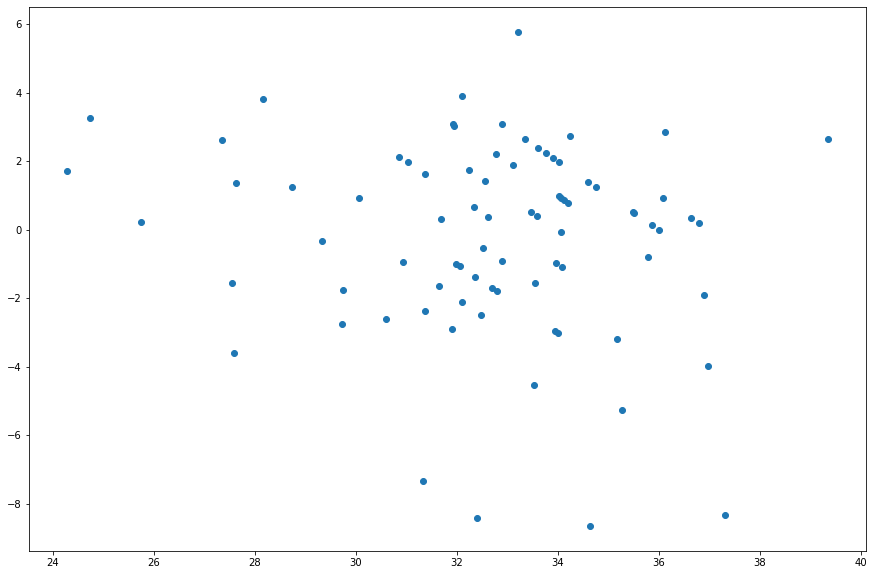

In [290]:
plt.scatter(pred, residual)

Performance Metrics

In [291]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mbe
print(mse(y_test, pred))
print(mbe(y_test, pred))
print(np.sqrt(mse(y_test, pred)))

7.9083133449923695
2.1382259197467426
2.8121723533582306


R Square and Adjusted R Square

In [292]:
from sklearn.metrics import r2_score
sco = r2_score(y_test, pred)

In [293]:
sco

0.41988725815059

In [294]:
# Adjusted R square
1-(1-sco)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.33701400931495995

Ridege Regression Algorithm

In [295]:
from sklearn.linear_model import Ridge

In [296]:
rid = Ridge()
rid

Ridge()

In [297]:
rid.fit(x_train, y_train)

Ridge()

In [298]:
#Coefficient

print(rid.coef_)

[[-1.48484454 -0.64712873 -0.22483209  0.93235544  0.01045159  0.31438063
   0.29214044  0.31913561 -0.37202232  0.1521408 ]]


In [299]:
# Intercept

print(rid.intercept_)

[32.01851852]


In [300]:
rid_pred = rid.predict(x_test)
rid_pred

array([[31.90437769],
       [33.52448236],
       [33.79993365],
       [25.78208708],
       [32.09810879],
       [33.61860839],
       [31.65795471],
       [34.63922429],
       [32.91713459],
       [33.53038734],
       [33.98899508],
       [32.91595068],
       [35.77551671],
       [31.96348587],
       [33.99360167],
       [33.48446181],
       [27.58373711],
       [36.11433145],
       [32.70316481],
       [24.72118595],
       [32.07826221],
       [32.43103749],
       [33.11696594],
       [33.19176449],
       [30.07434334],
       [34.04146269],
       [33.99083567],
       [35.25837659],
       [31.91894917],
       [34.5982373 ],
       [34.0827831 ],
       [33.93738194],
       [32.53410093],
       [32.79119713],
       [30.96107845],
       [28.75303894],
       [32.21766467],
       [31.96474388],
       [33.36606913],
       [33.88019105],
       [34.28296814],
       [33.94197542],
       [34.12754106],
       [37.23539053],
       [32.79438009],
       [36

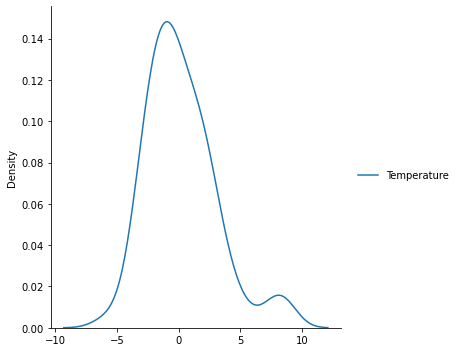

In [301]:
sns.displot(rid_pred-y_test, kind = 'kde')

Text(0, 0.5, 'Test Predicted Data')

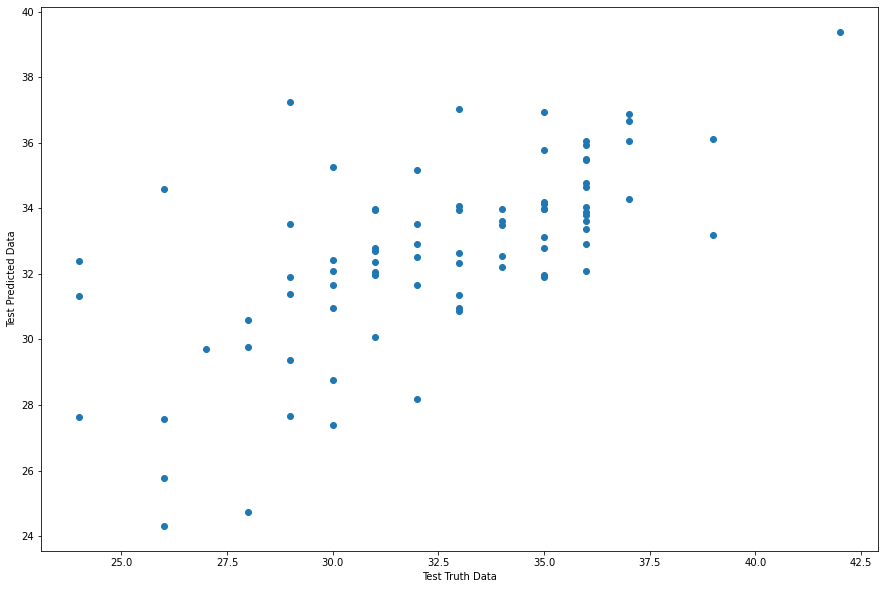

In [302]:
plt.scatter(y_test, rid_pred)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

In [303]:
# Residual
resd = y_test- rid_pred
resd

,Temperature
46,-2.904378
225,-4.524482
180,2.200066
116,0.217913
124,-2.098109
...,...
127,0.813925
241,-8.385590
207,-4.037160
102,2.618066


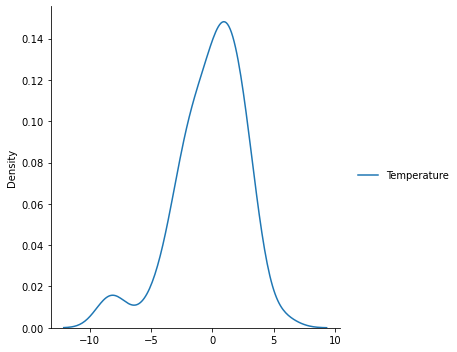

In [304]:
sns.displot(resd, kind = 'kde')

Scatter Plot with residual and prediction

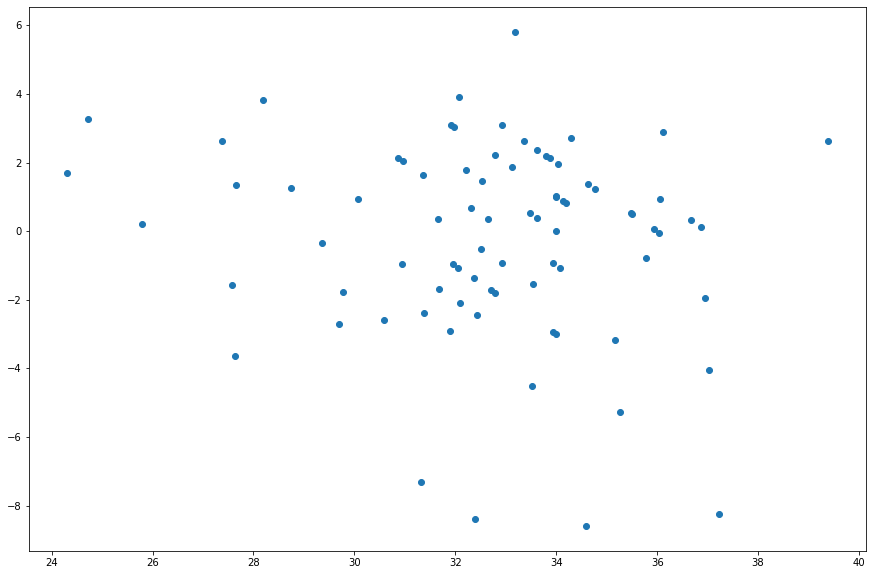

In [305]:
plt.scatter(rid_pred, resd)

In [306]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mbe
print(mse(y_test, rid_pred))
print(mbe(y_test, rid_pred))
print(np.sqrt(mse(y_test, rid_pred)))

7.879861182677923
2.1354668685114255
2.807109043603031


In [307]:
# R_Square

from sklearn.metrics import r2_score
rid_score = r2_score(y_test, rid_pred)
rid_score

0.4219743608198627

In [308]:
#Adjusted R Square
1-(1-rid_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.3393992695084145

Lasso Regression

In [309]:
from sklearn.linear_model import Lasso

In [310]:
lass = Lasso()
lass

Lasso()

In [311]:
lass.fit(x_train, y_train)

Lasso()

In [312]:
#Coeficient
lass.coef_

array([-0.91280146, -0.        , -0.        ,  0.90173726,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [313]:
#Intercept
lass.intercept_

array([32.01851852])

In [314]:
#Prediction for Test Data

lass_pred = lass.predict(x_test)
lass_pred

array([31.95266578, 33.58063844, 33.17199487, 29.2300088 , 32.11434059,
       33.00209116, 32.22012359, 33.59769723, 32.74029189, 33.03646764,
       32.4140298 , 32.63133753, 34.4768768 , 31.56013792, 32.83278845,
       33.36084355, 29.21895063, 34.86185996, 32.35942318, 29.52498257,
       32.34519365, 32.18977836, 32.58238943, 31.77830553, 31.09963378,
       33.24494547, 32.87985037, 34.11623824, 32.00727241, 31.9424675 ,
       33.25188919, 33.145422  , 32.79267024, 32.5523863 , 31.34728674,
       29.96302828, 32.32590659, 32.22458014, 33.3728448 , 33.23637448,
       33.25694673, 34.12729641, 33.23294422, 33.78620381, 32.89913743,
       34.65406632, 33.97539458, 33.74359843, 31.6914675 , 31.35705972,
       32.23058076, 35.54841851, 32.12351258, 33.62864345, 28.94703628,
       34.4611032 , 34.54605505, 32.48603732, 28.79230519, 32.17340377,
       31.99784153, 31.39709472, 29.07905006, 34.22896496, 33.41990672,
       30.14750361, 31.32037177, 31.40215226, 34.10235082, 30.40

In [315]:
#Performance Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mbe
print(mse(y_test, lass_pred))
print(mbe(y_test, lass_pred))
print(np.sqrt(mse(y_test, lass_pred)))

8.476626714024128
2.3529241290496663
2.911464702520731


In [316]:
# R_Square

from sklearn.metrics import r2_score
lass_score = r2_score(y_test, lass_pred)
lass_score

0.3781987447651852

In [317]:
#Adjusted R Square
1-(1-lass_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.2893699940173545

Elastic - Net Regression

In [318]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic

ElasticNet()

In [319]:
elastic.fit(x_train, y_train)

ElasticNet()

In [320]:
#Coefficient
elastic.coef_

array([-0.78572401, -0.23481715, -0.04983617,  0.70587623,  0.09920397,
        0.        ,  0.24559695,  0.03452823,  0.13940055,  0.        ])

In [321]:
#Intercept
elastic.intercept_

array([32.01851852])

In [322]:
#Prediction for Test Data
elastic_pred = elastic.predict(x_test)

In [323]:
elastic_pred

array([31.90456375, 33.33761595, 33.38580171, 28.60994724, 31.90032268,
       33.22917656, 31.74121657, 34.00177407, 32.79584993, 32.67444857,
       32.53672585, 32.69057945, 34.33750901, 31.91981689, 32.55112693,
       33.45132062, 29.16756201, 35.31463002, 32.37119771, 28.58133366,
       31.91338182, 31.91425219, 32.8742513 , 32.04205235, 30.72929775,
       33.46931188, 32.85335279, 34.11959975, 31.78220998, 32.45083502,
       33.35102564, 32.77454809, 32.22025119, 32.61455693, 31.44719202,
       29.84454088, 31.90446551, 32.08573221, 33.38276475, 32.84946832,
       33.62628998, 34.07244064, 33.48857794, 34.19175398, 32.83686194,
       35.66600187, 34.15162954, 34.20897614, 31.07165444, 31.30443497,
       32.29226957, 36.74855373, 31.98463589, 33.8811271 , 29.04873302,
       35.38363085, 35.164965  , 32.51162944, 28.94033201, 32.03103126,
       32.34681454, 31.30488372, 28.16073212, 34.17203456, 34.59034169,
       30.23944904, 30.61284909, 31.34047514, 34.84623265, 29.85

Text(0, 0.5, 'Test Predicted Data')

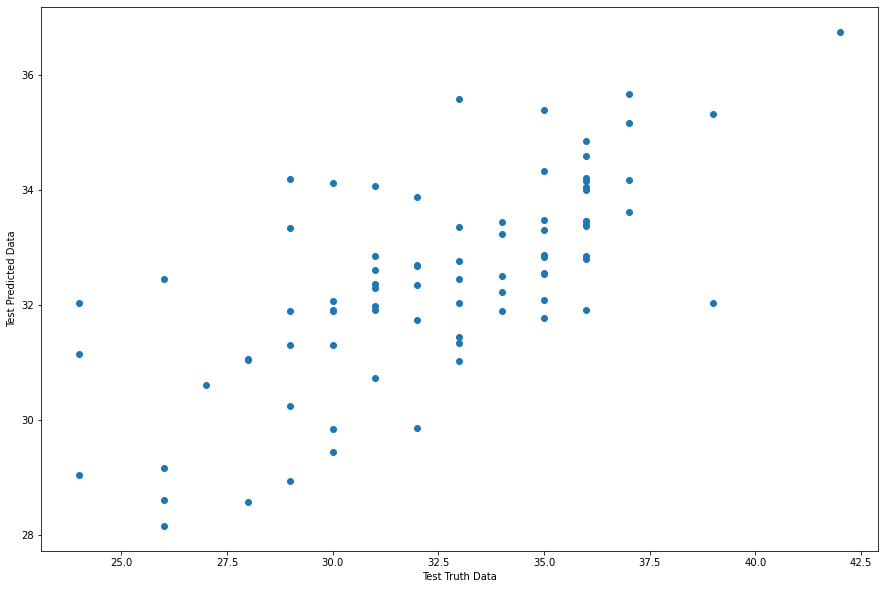

In [324]:
plt.scatter(y_test, elastic_pred)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

In [325]:
#Performance Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mbe
print(mse(y_test, elastic_pred))
print(mbe(y_test, elastic_pred))
print(np.sqrt(mse(y_test, elastic_pred)))

7.741875747176347
2.254745603874056
2.7824226399266427


In [326]:
# R_Square

from sklearn.metrics import r2_score
elastic_score = r2_score(y_test, elastic_pred)
elastic_score

0.4320962548106706

In [327]:
1-(1-elastic_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.35096714835505216

In [328]:
ds

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,05,06,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,09,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


# Logistic Regression

In [237]:
ds['Classes']  = ds['Classes'].replace('not fire', 0)
ds['Classes']  = ds['Classes'].replace('fire', 1)

In [238]:
ds

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,05,06,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,09,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


Plots for Logistic Regression

Temperature Vs Classes

In [240]:
ds.dtypes

day             object
month           object
year            object
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

In [241]:
col_name = ['Classes']
ds[col_name] = ds[col_name].apply(pd.to_numeric)

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

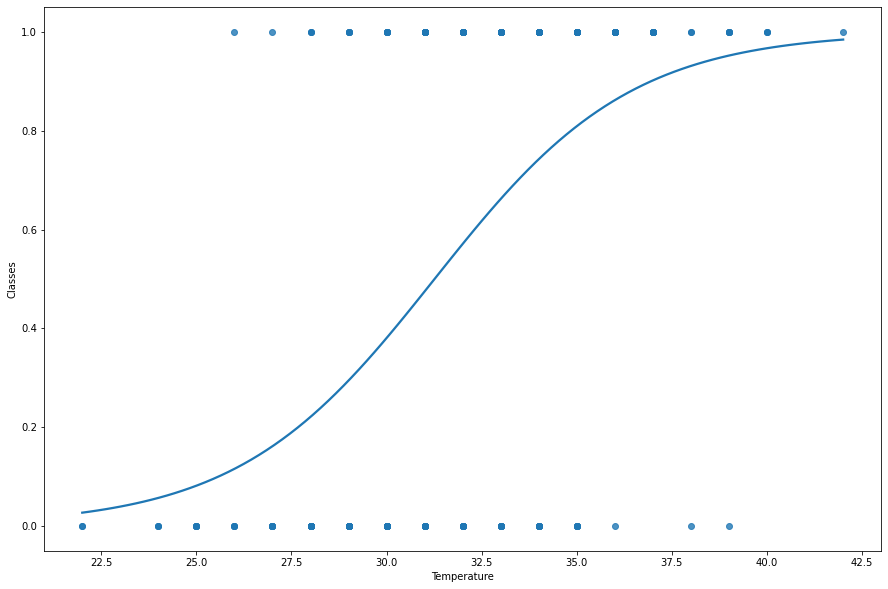

In [242]:
sns.regplot(x='Temperature', y = 'Classes', data = ds, logistic=True, ci= None)

RH Vs Classes

<AxesSubplot:xlabel='RH', ylabel='Classes'>

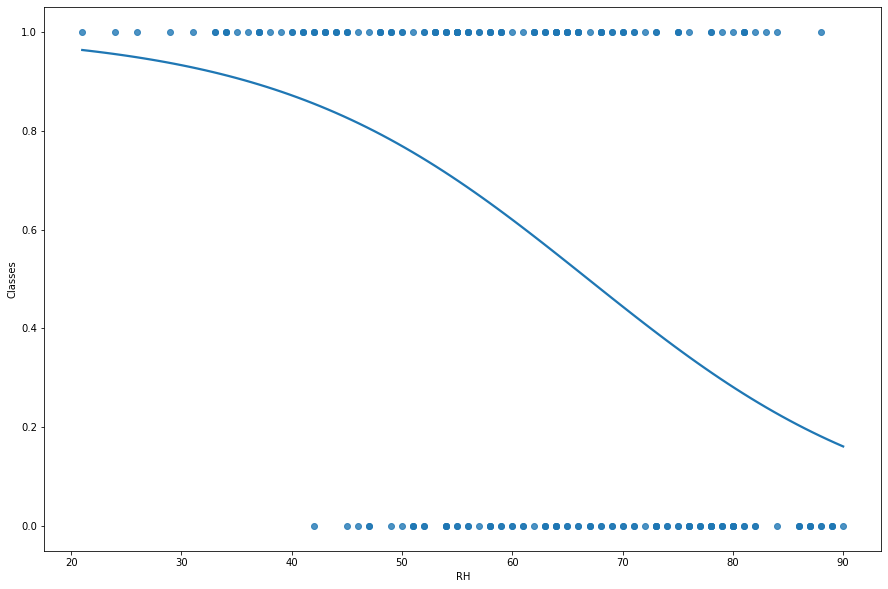

In [243]:
sns.regplot(x='RH', y = 'Classes', data = ds, logistic=True, ci= None)

Ws Vs Classes

<AxesSubplot:xlabel='Ws', ylabel='Classes'>

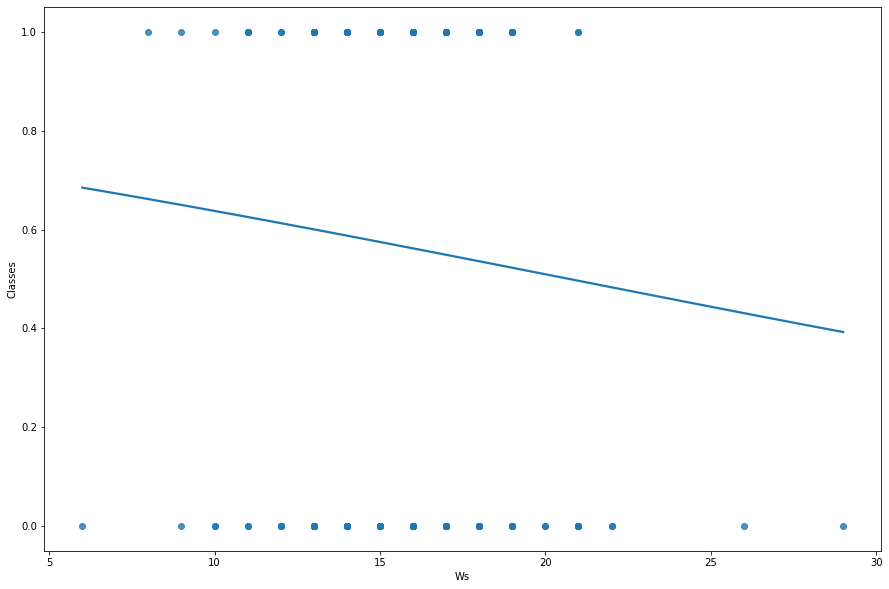

In [244]:
sns.regplot(x='Ws', y = 'Classes', data = ds, logistic=True, ci= None)

Rain Vs Classes

<AxesSubplot:xlabel='Rain', ylabel='Classes'>

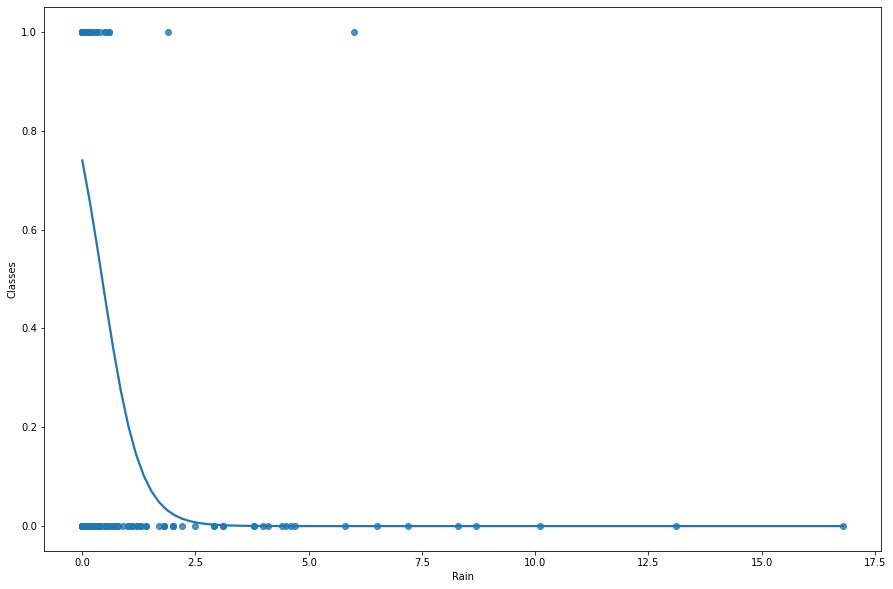

In [245]:
sns.regplot(x='Rain', y = 'Classes', data = ds, logistic=True, ci= None)

FFMC Vs Classes

<AxesSubplot:xlabel='FFMC', ylabel='Classes'>

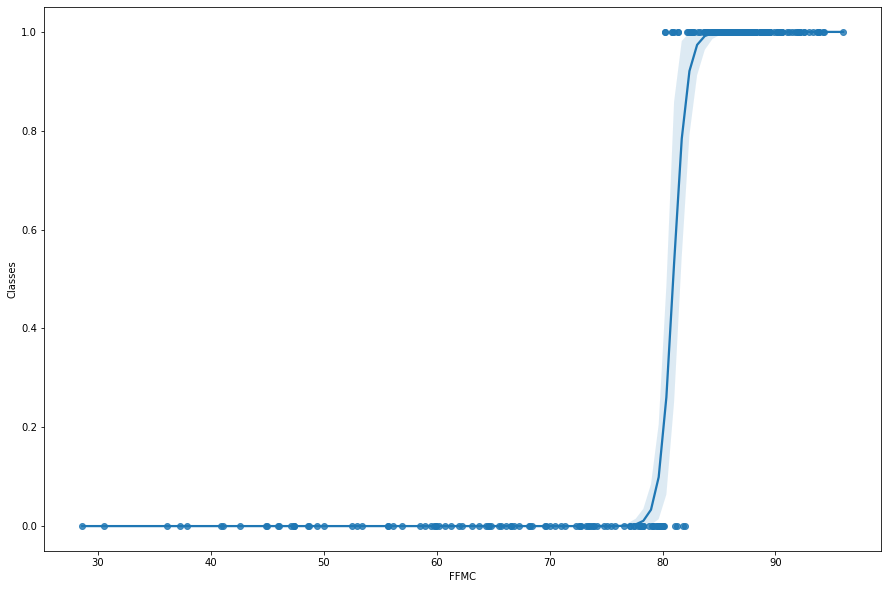

In [248]:
sns.regplot(x='FFMC', y = 'Classes', data = ds, logistic=True)

DMC Vs Classes

<AxesSubplot:xlabel='DMC', ylabel='Classes'>

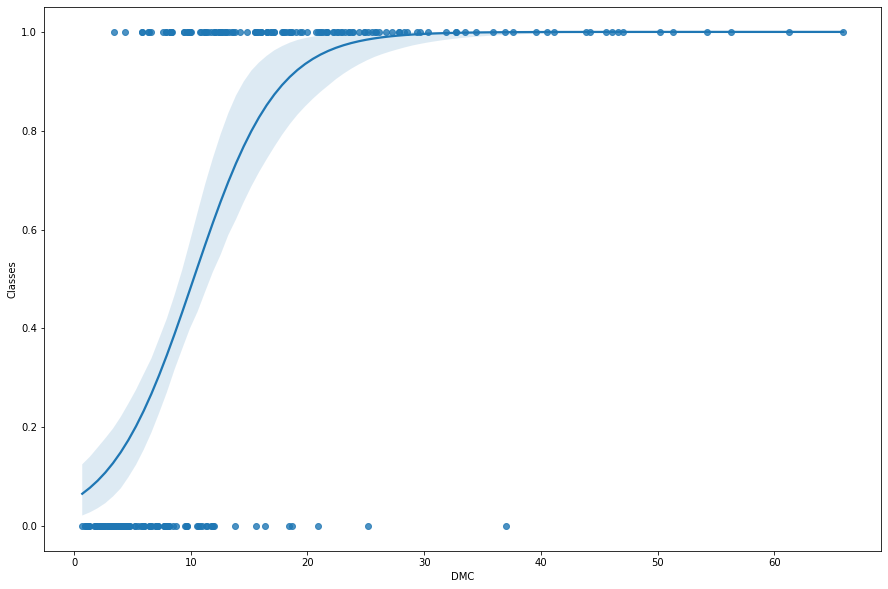

In [249]:
sns.regplot(x='DMC', y = 'Classes', data = ds, logistic=True)

DC Vs Classes

<AxesSubplot:xlabel='DC', ylabel='Classes'>

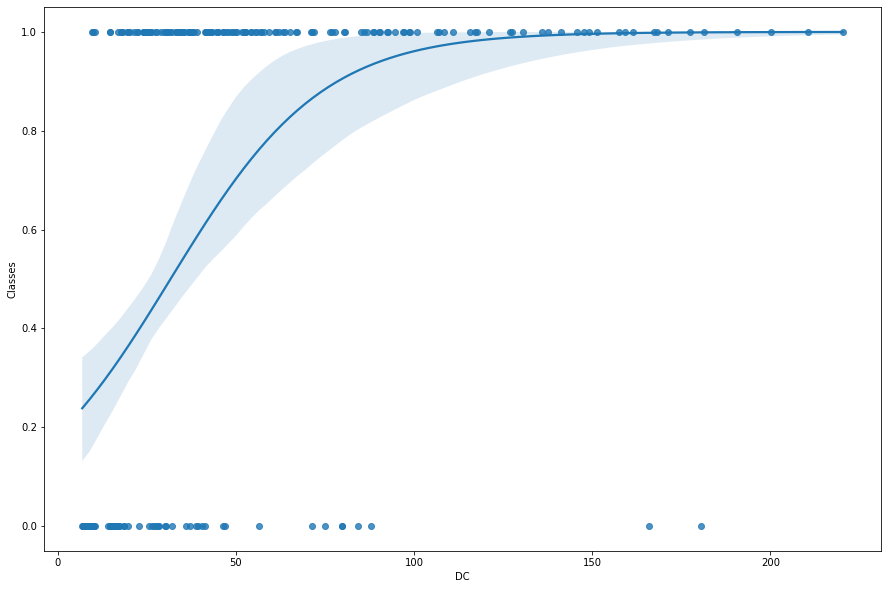

In [250]:
sns.regplot(x='DC', y = 'Classes', data = ds, logistic=True)

ISI Vs Classes

<AxesSubplot:xlabel='ISI', ylabel='Classes'>

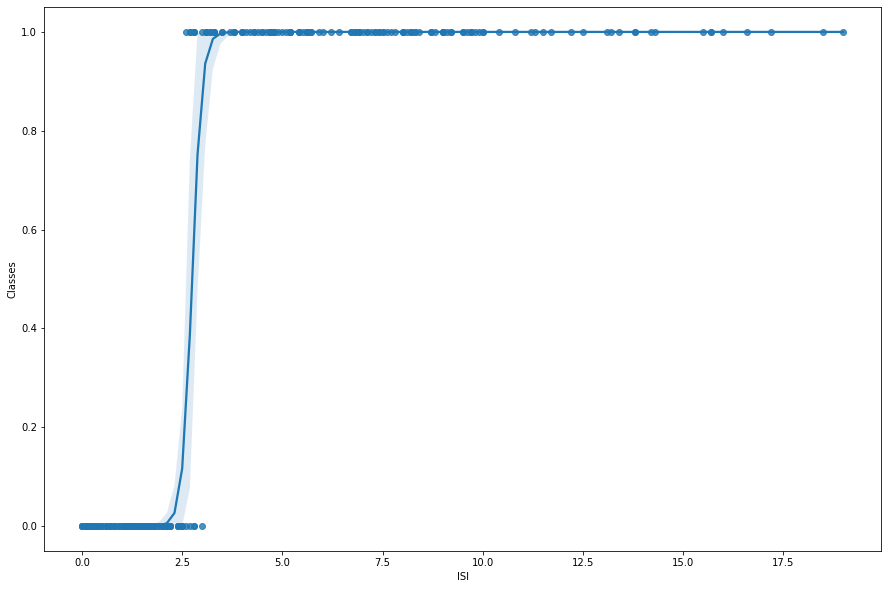

In [251]:
sns.regplot(x='ISI', y = 'Classes', data = ds, logistic=True)

BUI Vs Classes

<AxesSubplot:xlabel='BUI', ylabel='Classes'>

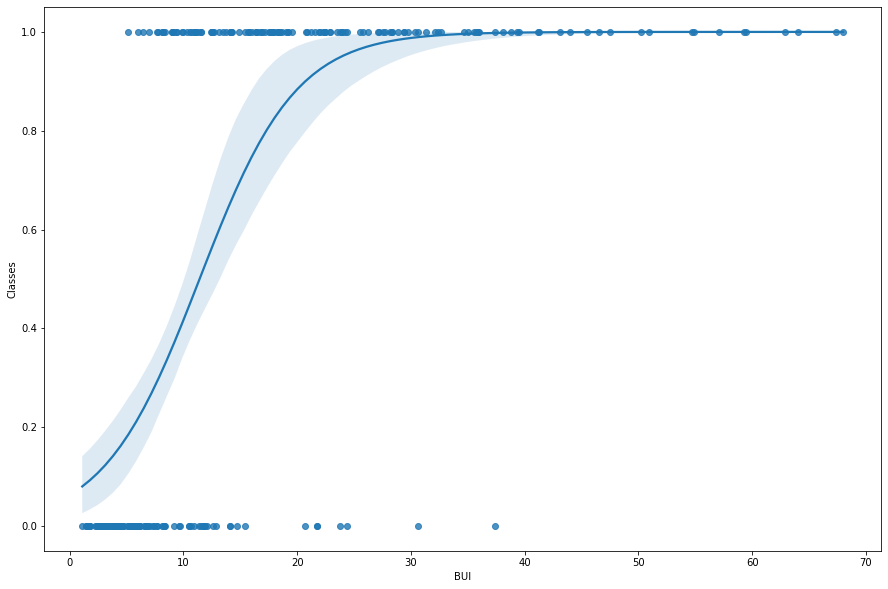

In [252]:
sns.regplot(x='BUI', y = 'Classes', data = ds, logistic=True)

FWI Vs Classes

<AxesSubplot:xlabel='FWI', ylabel='Classes'>

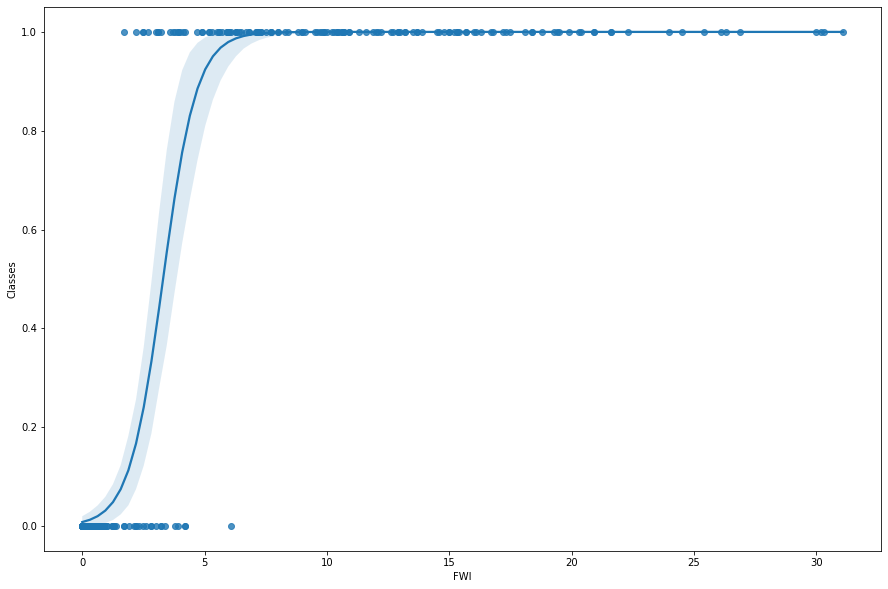

In [253]:
sns.regplot(x='FWI', y = 'Classes', data = ds, logistic=True)

Region Vs Classes

<AxesSubplot:xlabel='Region', ylabel='Classes'>

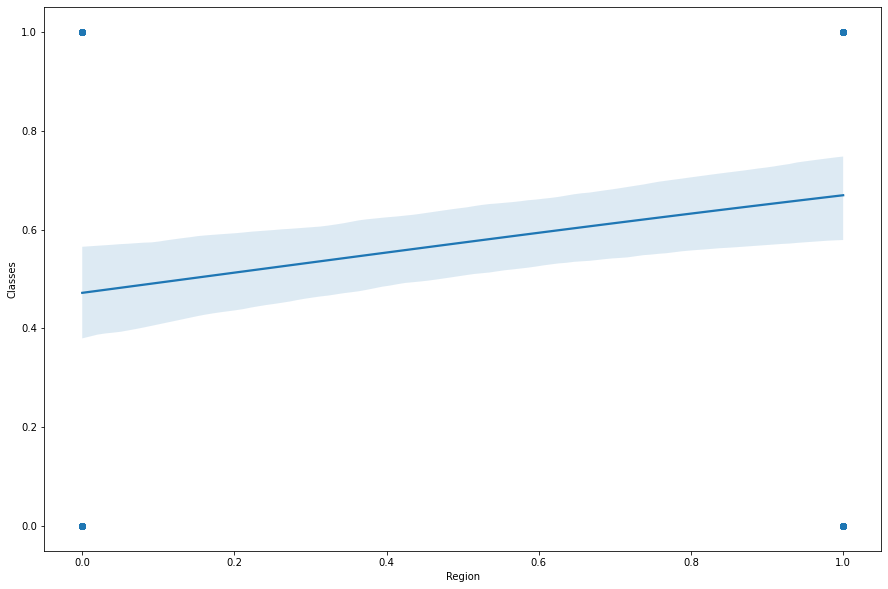

In [255]:
sns.regplot(x='Region', y = 'Classes', data = ds, logistic=True)

# Model Training - Logistic Regression

## Independent and Dependent Feature Seperation

Independent Feature

In [355]:
x = ds.drop('Classes', axis = 1)

Dependnet Feature

In [356]:
y = ds['Classes']

In [357]:
x.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,05,06,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [358]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int64

Training and Test Split

In [359]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=355)

In [360]:
x_train.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
38,09,07,2012,32,68,14,1.4,66.6,7.7,9.2,1.1,7.4,0.6,0
53,24,07,2012,28,78,16,0.1,70.0,9.6,79.7,1.4,14.7,1.3,0
169,19,07,2012,34,58,16,0.0,88.1,27.8,61.1,7.3,27.7,13.0,1
46,17,07,2012,29,70,14,0.0,82.8,9.4,34.1,3.2,11.1,3.6,0
58,29,07,2012,32,73,15,0.0,86.6,26.7,127.0,5.6,35.0,11.9,0


In [361]:
y_train.head()

38     0
53     0
169    1
46     1
58     1
Name: Classes, dtype: int64

In [362]:
x_test

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
96,05,09,2012,29,75,16,0.0,80.8,3.4,24.0,2.8,5.1,1.7,0
132,12,06,2012,27,58,17,0.0,88.9,21.3,37.8,8.7,21.2,12.9,1
121,30,09,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,0
143,23,06,2012,33,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,1
107,16,09,2012,30,65,14,0.0,78.1,3.2,15.7,1.9,4.2,0.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,08,08,2012,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,2.6,0
220,08,09,2012,30,88,14,0.0,82.5,6.6,26.1,3.0,8.1,2.7,1
195,14,08,2012,37,40,13,0.0,91.9,22.3,55.5,10.8,22.3,15.7,1
187,06,08,2012,30,54,14,3.1,70.5,11.0,9.1,1.3,10.5,0.8,1


In [363]:
y_test

96     1
132    1
121    0
143    0
107    0
      ..
68     0
220    1
195    1
187    0
127    1
Name: Classes, Length: 61, dtype: int64

In [364]:
x_train.shape

(182, 14)

In [365]:
y_train.shape

(182,)

In [366]:
x_test.shape

(61, 14)

In [367]:
y_test.shape

(61,)

Standardization

In [368]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [369]:
x_train = scaler.fit_transform(x_train)

In [370]:
x_test = scaler.transform(x_test)

In [371]:
x_train

array([[-0.83745829, -0.44033037,  0.        , ..., -0.69582883,
        -0.88870705, -1.04496604],
       [ 0.89587085, -0.44033037,  0.        , ..., -0.1907323 ,
        -0.79501185, -1.04496604],
       [ 0.31809447, -0.44033037,  0.        , ...,  0.70875468,
         0.77103647,  0.9569689 ],
       ...,
       [-1.18412412, -0.44033037,  0.        , ..., -0.34295317,
        -0.05883529, -1.04496604],
       [ 1.58920251,  0.4703529 ,  0.        , ...,  1.37991035,
        -0.40684603, -1.04496604],
       [-0.72190302, -1.35101364,  0.        , ..., -0.30143839,
         0.36948562,  0.9569689 ]])

In [372]:
x_test

array([[-1.29967940e+00,  1.38103617e+00,  0.00000000e+00,
        -9.04770663e-01,  8.52261111e-01,  2.49776362e-01,
        -4.20936339e-01,  1.85399456e-01, -9.47994650e-01,
        -5.66649853e-01, -4.77618034e-01, -8.54968840e-01,
        -7.41471734e-01, -1.04496604e+00],
       [-4.90792464e-01, -1.35101364e+00,  0.00000000e+00,
        -1.45275156e+00, -2.75581437e-01,  6.02174020e-01,
        -4.20936339e-01,  7.48588984e-01,  4.58690374e-01,
        -2.81439879e-01,  9.60593532e-01,  2.59011192e-01,
         7.57651439e-01,  9.56968899e-01],
       [ 1.58920251e+00,  1.38103617e+00,  0.00000000e+00,
        -2.00073247e+00,  1.05129215e+00, -4.55018954e-01,
         4.28941468e-01, -2.30375920e+00, -1.06587328e+00,
        -9.07661778e-01, -1.11140618e+00, -1.04178537e+00,
        -9.55632188e-01, -1.04496604e+00],
       [ 7.80315573e-01, -1.35101364e+00,  0.00000000e+00,
         1.91191139e-01, -2.09237758e-01,  2.49776362e-01,
         6.47081219e-02, -2.73495715e-01, -6.

In [373]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [374]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [375]:
# Prediciton

log_pred = log_reg.predict(x_test)
log_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

Performance Metrics

Confusion Matix

In [376]:
from sklearn.metrics import confusion_matrix

conf_mat =  confusion_matrix(y_test, log_pred)
conf_mat

array([[27,  0],
       [ 2, 32]], dtype=int64)

In [377]:
TP = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]
TN = conf_mat[1][1]

Accuracy Score

In [380]:
acc_sco= round(((TP+TN)/(TP+FP+FN+TN)), 4)
acc_manual

0.9672

Precision Score

In [383]:
Pre_sco= round(TP/(TP+FP),4)
Pre_sco

1.0

Recall Score

In [385]:
rec_sco = round(TP/(TP+FN), 4)
rec_sco

0.931

F-1 Score

In [388]:
f1_sco =round(2*(Pre_sco * rec_sco)/(Pre_sco+rec_sco),4)
f1_sco

0.9643

Classificaiton Report

In [389]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      0.94      0.97        34

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



In [391]:
# Saving the Model
with open('mode_Logistic_regression_algerian.sav', 'wb') as f:
    pickle.dump(log_reg, f)

In [392]:
ds.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,05,06,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


# Accuracy of the model is 97%